## Results and Interpretation

Analyzing the performance of the final model on the test set.

In [5]:
# Load Libraries
import pandas as pd
import pickle
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load model
with open("../models/best_rf_model.pkl", "rb") as f:
    best_rf = pickle.load(f)

# Load test data
with open("../data/split_data/x_test.pkl", "rb") as f:
    x_test = pickle.load(f)

with open("../data/split_data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

---
## Evaluating Model

1. Classification report
- Accuracy: correct predictions
- Precision: how many predicted "positives" were correct
- Recall: How well the model captures actual cases of heart disease
- F1 Score: 

In [6]:
y_pred = best_rf.predict(x_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1600
           1       0.21      0.21      0.21       400

    accuracy                           0.68      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.68      0.68      0.68      2000



2. Confusion Matrix

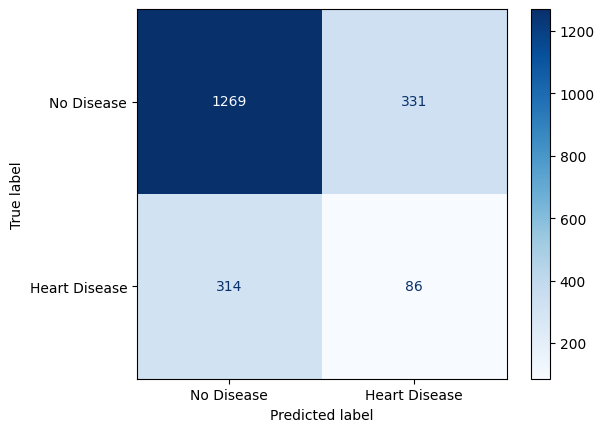

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, x_test, y_test, display_labels=["No Disease", "Heart Disease"], cmap="Blues")

Results & Interpretation Notebook
Purpose: Analyze and interpret model results in a meaningful way.

What to include:

Load saved model and test set

Show:

Accuracy

Precision, Recall, F1-Score

Confusion matrix

ROC curve, AUC score

Explain what the metrics mean

e.g., “Recall is low because…”

Discuss misclassifications or model behavior

Feature importance or SHAP values

Summary: "What do results tell us about predicting heart disease?"